# ANOVA as a linear model 

## Crime TV Show Ratings

### Introduction

A random sample of 55 crime shows was taken from each decade (1990s, 2000s, 2010s). The following
variables are provided in `crime_show_ratings.RDS`:

| Variable        | Description                                      | 
| :-------------- | :----------------------------------------------- | 
| `season_number` | Season of show                                   |
| `title`         | Name of show                                     |
| `season_rating` | Average rating of episodes in the given season   |
| `decade`        | Decade this season is from (1990s, 2000s, 2010s) |
| `genres`        | Genres this shows is part of                     |

*Question of interest: We want to know if the average season rating for crime shows is the same decade to decade.*

### Model

First, we can write the equation for a linear model that would help us answer our question of interest. <p>

Linear model: 
    $$\mu_i = \mu_{1990} + \beta_1 \cdot d_{2000i} + \beta_2 \cdot d_{2010i}$$

Where 
    $$\beta_1 = \mu_{2000} - \mu_{1990}$$
    $$\beta_2 = \mu_{2010} - \mu_{1990}$$
    
$\mu_i$ is the mean season rating for the $i^{th}$ decade. <p>
$d_{2000i}, d_{2010i}$ are dummy variables (0 or 1) for each decade.

### Assumptions

Next, we can state the assumptions for the ANOVA.

Let $\epsilon_i$ be the difference between the observed value of a season’s rating and the group mean for the decade that season was in. Our assumptions for ANOVA are:
> 1. All $\epsilon_i$ are independent <p>
> 2. Errors are normally distributed with $\text{E}[\epsilon_i] = 0$ <p>
> 3. Constant variance (homoscedasticity), $\text{Var}[\epsilon_i] = \sigma^2$

### Hypothesis

Hypothesis for an ANOVA for the question of interest:
> $H_0$: the average season rating of crime shows is the same in the 1990s, 2000s and 2010s <p>
> $H_1$: at least one decade’s mean season rating for crime shows is different from the others

### Visualization

Let's make two plots, side-by-side boxplots, and faceted histograms, of the season ratings for each decade.

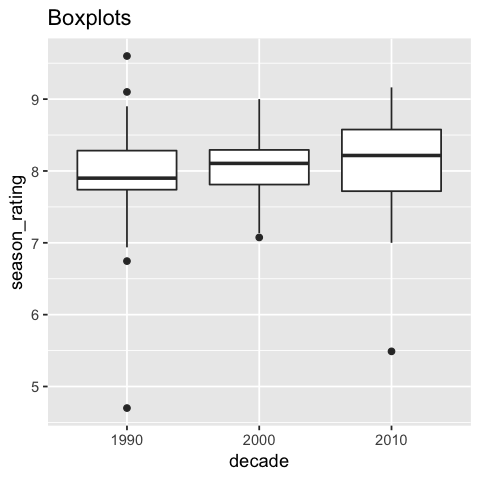

In [2]:
# Load libraries
library(tidyverse)
library(repr)

# Load data
crime_show_data <- readRDS("datasets/crime_show_ratings.RDS")

# Adjust plot size
options(repr.plot.width = 4, repr.plot.height = 4)

# Side-by-side boxplots
crime_show_data %>%
    ggplot(aes(x = decade, y = season_rating)) + 
        geom_boxplot() +
        ggtitle("Boxplots")

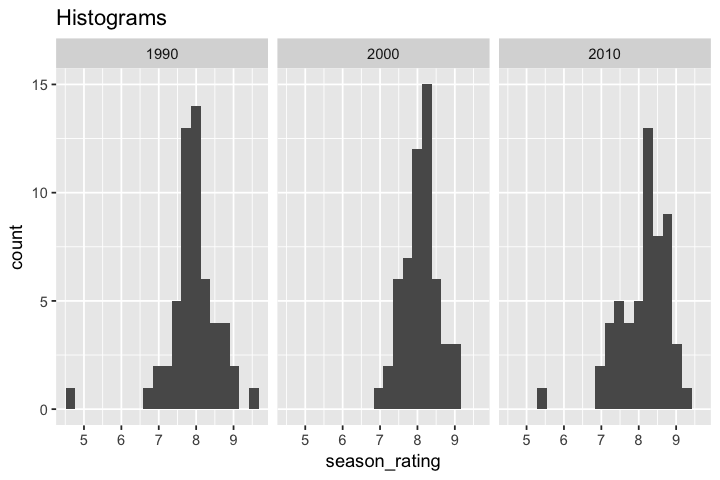

In [3]:
# Adjust plot size
options(repr.plot.width = 6, repr.plot.height = 4)

# Facetted histograms
crime_show_data %>% 
    ggplot(aes(x = season_rating)) +
    geom_histogram(bins=20) +
    facet_wrap(~decade) +
    ggtitle("Histograms")

Comparing the boxplots and the histograms, I prefer the boxplots as they give a quick way to consider variability through the IQR and range. From the boxplots, we can see the means are too similar compared to the variation in each group. I suspect that there are no significant differences between any of them.

### One-way ANOVA

We can conduct a one-way ANOVA to answer the question of interest above.

In [4]:
# ANOVA
anova1 <- aov(season_rating ~ decade, data = crime_show_data)
summary(anova1)

             Df Sum Sq Mean Sq F value Pr(>F)
decade        2   1.09  0.5458   1.447  0.238
Residuals   162  61.08  0.3771               

The p-value of 0.238 means that we have no evidence against the null hypothesis that all the decade mean ratings for crime shows are the same.

### Assumption Validation

We can verify the model assumptions by creating a residual plot, a Normal Q-Q plot, and the variance of season rating by decade.

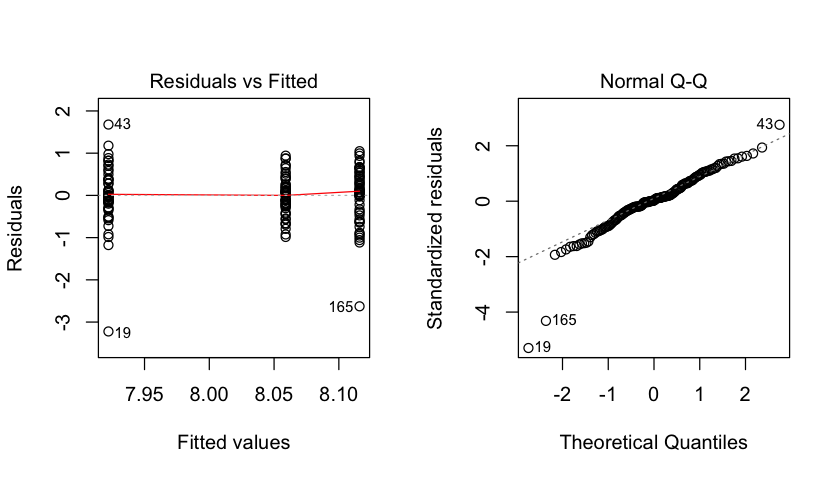

In [5]:
# Adjust plot size
options(repr.plot.width = 7, repr.plot.height = 4)

# Plot side-by-side
par(mfrow=c(1, 2))

# Residual plot
plot(anova1, 1)

# Normal Q-Q plot
plot(anova1, 2)

The first plot shows the residuals of the model against the fitted values and the second plot shows the residuals (standardized) against a theoretical normal distribution of residuals. The residuals for each group are roughly centered around zero and appear to be fairly normal, though with some outliers (observations 19 and 165 as seen in the second plot). ANOVA is robust to departures from normality.

In [6]:
# Variance of season rating by decade
crime_show_data %>%
    group_by(decade) %>%
    summarise(var_rating = sd(season_rating)^2)

decade,var_rating
1990,0.4804055
2000,0.2033781
2010,0.4474082


There are specific tests for equality of variances, but for simplicity, I will just consider a rule of thumb from Dean and Voss (*Design and Analysis of Experiments, 1999, page 112*): if the ratio of the largest within-in group variance estimate to the smallest within-group variance estimate does not exceed 3, $s^2_{max}/s^2_{min} < 3$, the assumption is probably satisfied. The largest within-group variance is 2.36 times
larger than the smallest, so by our rule of thumb the variances are roughly equivalent.

### Regression

We can conduct a linear model based on the question of interest.

In [7]:
# Linear model
lm1 <- lm(season_rating ~ decade, data = crime_show_data)
summary(lm1)


Call:
lm(formula = season_rating ~ decade, data = crime_show_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2222 -0.2589  0.0135  0.3862  1.6778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.9222     0.0828  95.679   <2e-16 ***
decade2000    0.1368     0.1171   1.168   0.2444    
decade2010    0.1938     0.1171   1.655   0.0998 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6141 on 162 degrees of freedom
Multiple R-squared:  0.01756,	Adjusted R-squared:  0.005426 
F-statistic: 1.447 on 2 and 162 DF,  p-value: 0.2382


The intercept of 7.92 represents our observed group mean for the 1990s while the other coefficients represent the difference between the group means for the 2000s and 2010s respectively, and the 1990s.

> $\hat{\mu}_{1990s} = 7.92$ <p>
> $\hat{\mu}_{2000s} = 7.92 + 0.14 = 8.06$ <p>
> $\hat{\mu}_{2010s} = 7.92 + 0.19 = 8.11$ <p>